In [1]:
from fastai.vision import *


In [2]:
folders=[]
folders.append('Charmender')
folders.append('Squirtle')
folders.append('Bulbasaur')
files=[]
files.append('Charmender.csv')
files.append('Squirtle.csv')
files.append('Bulbasaur.csv')



In [3]:
path=Path('data/Pokemon')
for folder in folders:
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)

In [4]:
path=Path('data/Pokemon')
i=0
for folder in folders:
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    st=os.path.join(dest, files[i])
    download_images(st, dest, max_pics=200)
    i+=1

path.ls()
classes = ['Charmender','Squirtle','Bulbasaur']

In [5]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)


Charmender


Squirtle


Bulbasaur


In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=0,bs=32).normalize(imagenet_stats)


(['Bulbasaur', 'Charmender', 'Squirtle'], 3, 472, 118)

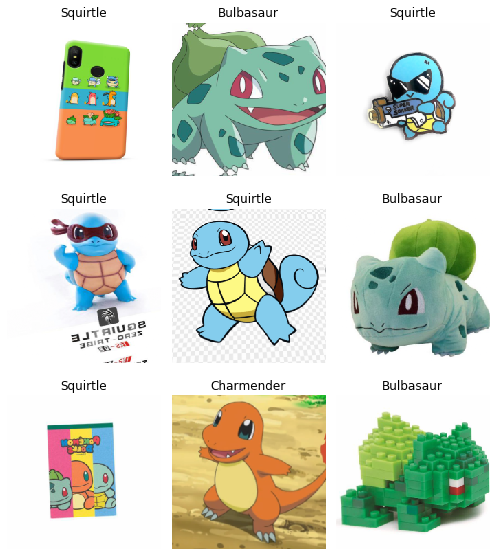

In [7]:
data.show_batch(rows=3, figsize=(7,8))
data.classes, data.c, len(data.train_ds), len(data.valid_ds)



In [8]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)


In [ ]:
learn.fit_one_cycle(10)


epoch,train_loss,valid_loss,error_rate,time
0,0.266239,0.673475,0.135593,00:15
1,0.227171,0.628239,0.127119,00:15
2,0.219068,0.542666,0.135593,00:15
